In [61]:
import pandas as pd #import pandas library

In [62]:
data = pd.read_csv('sales_v2.csv') #upload dataframe
data.head() #display first five rows of the dataframe

,order_id,date,customer_id,category,region,sales,quantity,discount
0,59570135,2017-10-16,512,Одежда и обувь,Ставропольский край,1301,2,0.00
1,16578697,2017-07-18,512,Одежда и обувь,Ставропольский край,3530,4,0.05
2,46943601,2017-07-05,512,Бытовая техника,Ставропольский край,5773,1,0.10
3,42436035,2017-02-18,512,Спорт и отдых,Ставропольский край,4723,3,0.03
4,49798299,2017-09-08,512,Красота,Ставропольский край,1936,3,0.00


In [63]:
import matplotlib.pyplot as plt #import matplotlib library

In [64]:
data_1 = data['region'].value_counts().to_frame(name='rows_number') #count rows in each region 
data_1.reset_index(inplace= True) #drop index
data_1 #display data_1

,region,rows_number
0,Амурская область,218842
1,Московская область,217496
2,Хабаровский край,174621
3,Ленинградская область,173933
4,Приморский край,132490
5,Краснодарский край,131607
6,Иркутская область,130660
7,Ставропольский край,109183
8,Владимирская область,89251
9,Красноярский край,88954


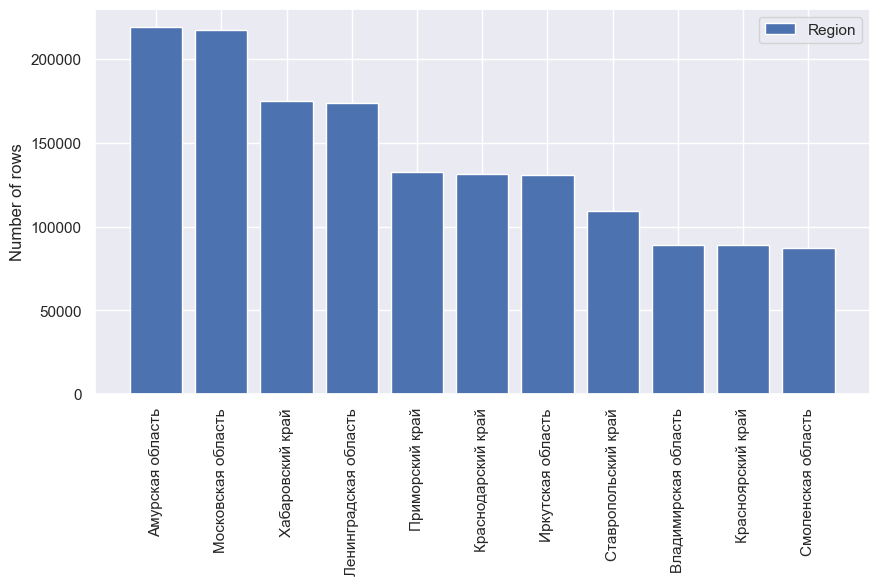

In [65]:
#building a distribution bar chart

plt.figure(figsize=(10, 5))

x = data_1['region']
y = data_1['rows_number']

plt.bar(x, y, label='Region')
plt.ylabel('Number of rows')
plt.legend()
plt.xticks(rotation=90)
plt.show()

In [66]:
data.info() #get information about the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1554192 entries, 0 to 1554191
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   order_id     1554192 non-null  int64  
 1   date         1554192 non-null  object 
 2   customer_id  1554192 non-null  int64  
 3   category     1554192 non-null  object 
 4   region       1554192 non-null  object 
 5   sales        1554192 non-null  int64  
 6   quantity     1554192 non-null  int64  
 7   discount     1554192 non-null  float64
dtypes: float64(1), int64(4), object(3)
memory usage: 94.9+ MB


In [67]:
#drop days from column month

data['month'] = data['date'].str.slice(start=0, stop=7)
data.head()

,order_id,date,customer_id,category,region,sales,quantity,discount,month
0,59570135,2017-10-16,512,Одежда и обувь,Ставропольский край,1301,2,0.00,2017-10
1,16578697,2017-07-18,512,Одежда и обувь,Ставропольский край,3530,4,0.05,2017-07
2,46943601,2017-07-05,512,Бытовая техника,Ставропольский край,5773,1,0.10,2017-07
3,42436035,2017-02-18,512,Спорт и отдых,Ставропольский край,4723,3,0.03,2017-02
4,49798299,2017-09-08,512,Красота,Ставропольский край,1936,3,0.00,2017-09


In [68]:
#create dataframe 'sales_region' where has been counted sales for each region and month

sales_region = data.groupby(['region', 'month'])['sales'].sum().reset_index()
sales_region

,region,month,sales
0,Амурская область,2017-01,13892593
1,Амурская область,2017-02,18513597
2,Амурская область,2017-03,26154950
3,Амурская область,2017-04,30880044
4,Амурская область,2017-05,35140301
...,...,...,...
369,Хабаровский край,2019-06,27884589
370,Хабаровский край,2019-07,27770391
371,Хабаровский край,2019-08,23312918
372,Хабаровский край,2019-09,18538074


In [69]:
#build a graph of sales dynamics by month with the ability to select a region

import plotly.express as px

fig = px.line(sales_region, x='month', y='sales', color='region')

fig.update_layout(
    updatemenus=[
        {
            "buttons": [{ "label": 'All regions', "method": "restyle", "args": [{"visible": [True for _ in fig.data]}], }] +
            [
                {
                    "label": t.name,
                    "method": "restyle",
                    "args": [{"visible": [t2.name == t.name for t2 in fig.data]}],
                }
                for t in fig.data
            ]
        }
    ]
)

fig.show()